In [ ]:
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [4]:
adult.data.features.shape, adult.data.targets.shape

((48842, 14), (48842, 1))

In [ ]:
from comet_ml import Experiment

#@title CometML set up
project_name = 'predict-income'
workspace = '-'
api_key = ''

experiment = Experiment(project_name=project_name, workspace=workspace, api_key = api_key, log_code=True)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/koleslena/predict-income/c3df66a34d2740d3b05533665cdce04c



In [60]:
df_columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df_train = pd.read_csv('../data/adult.data', header=None, names=df_columns)
df_test = pd.read_csv('../data/adult.test', header=None, names=df_columns)

df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,>50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [46]:
df_train.shape, df_test.shape

((32561, 15), (16281, 15))

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [47]:
target_name = 'income'

In [62]:
df_train[target_name] = df_train[target_name].apply(lambda x: 1 if x.find('<=50K') == -1 else 0)
df_test[target_name] = df_test[target_name].apply(lambda x: 1 if x.find('<=50K.') == -1 else 0)

In [63]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [64]:
y_train = df_train[target_name]
y_test = df_test[target_name]

X_train = df_train.drop(columns=[target_name])
X_test = df_test.drop(columns=[target_name])

In [65]:
y_train.value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

In [87]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [86]:
df_train.describe().T.shape[0]

7

In [88]:
df_train.describe().head().columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

{'web': 'https://www.comet.com/api/image/download?imageId=d2991a8398734e2cae6fc3e47c78b45a&experimentKey=c3df66a34d2740d3b05533665cdce04c',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=d2991a8398734e2cae6fc3e47c78b45a&experimentKey=c3df66a34d2740d3b05533665cdce04c',
 'imageId': 'd2991a8398734e2cae6fc3e47c78b45a'}

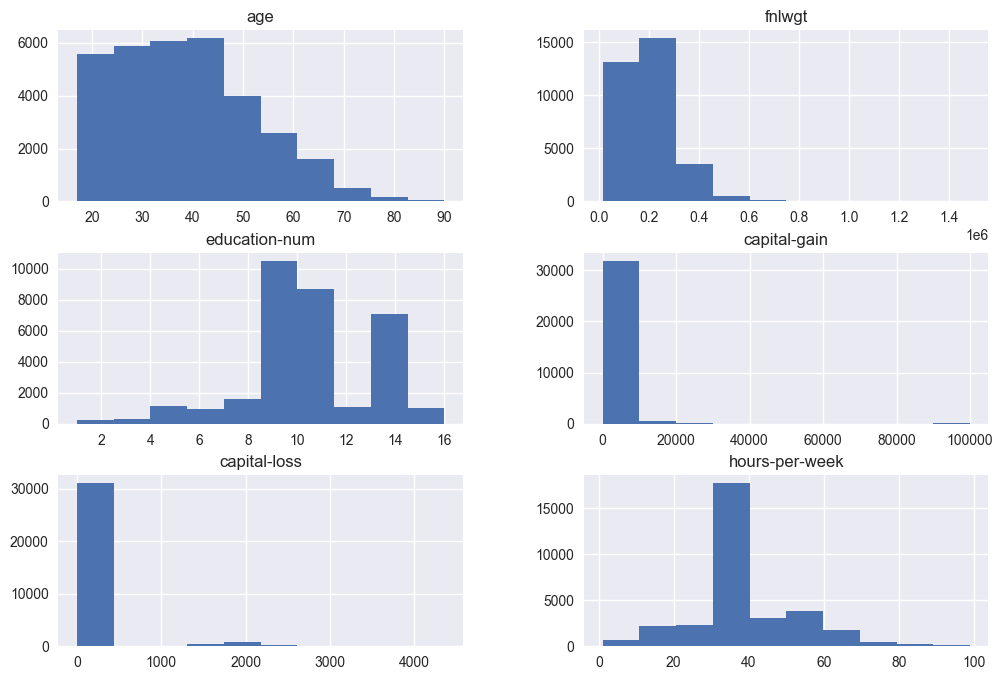

In [128]:
X_train.hist(figsize=(12,8))
experiment.log_figure('X_train_numeric_distr', plt)

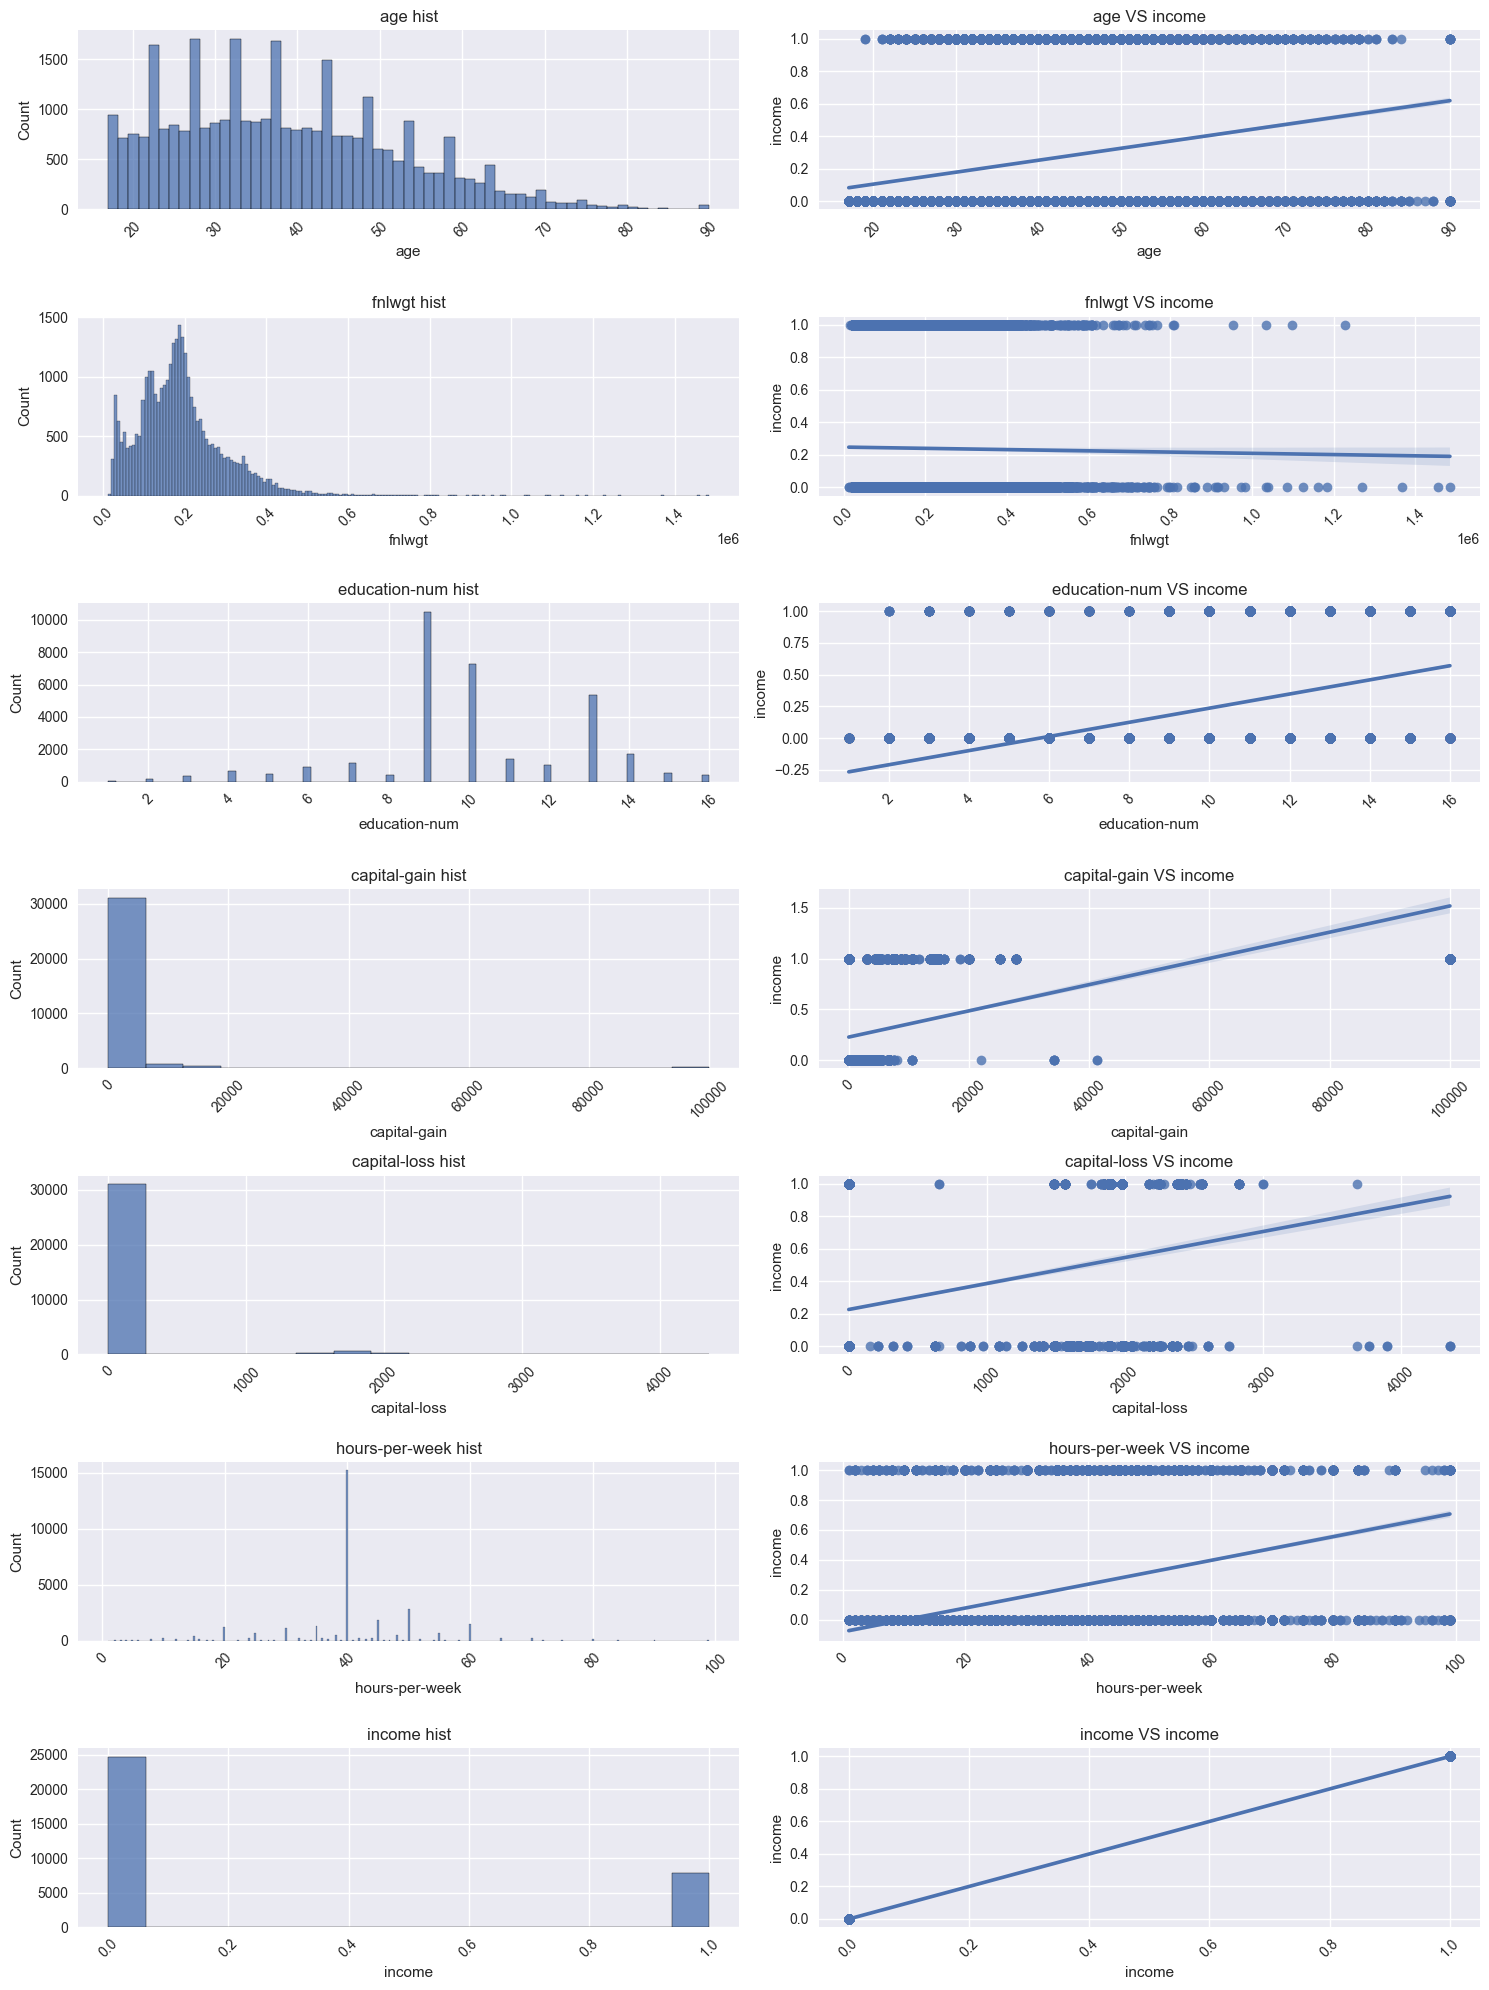

In [ ]:
num_features = df_train.describe().head().columns

n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=df_train, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=df_train, x=feature, y='income', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS income'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [92]:
X_train['workclass'].value_counts(True).head(1)

workclass
Private    0.69703
Name: proportion, dtype: float64

In [93]:
X_train['education'].value_counts(True).head(1)

education
HS-grad    0.322502
Name: proportion, dtype: float64

In [94]:
X_train['workclass'] = X_train['workclass'].fillna('Private')
X_train['education'] = X_train['education'].fillna('HS-grad')

X_test['workclass'] = X_test['workclass'].fillna('Private')
X_test['education'] = X_test['education'].fillna('HS-grad')

In [95]:
categorical_features = ['workclass', 'education', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 
                        'native-country']

non_categorical_features = ['age', 'capital-gain', 'capital-loss', 
                            'hours-per-week']

In [96]:
X_train[categorical_features].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train_le = X_train.copy()
X_test_le = X_test.copy()

for feature in categorical_features:
    X_train_le[feature] = label_encoder.fit_transform(X_train_le[feature])
    X_test_le[feature] = label_encoder.transform(X_test_le[feature])

X_train_le.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [98]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
X_train_onehot = onehot_encoder.fit_transform(X_train[categorical_features]).toarray()

# применяем полученное преобразование к тестовой выборке, результат переводим в массив
X_test_onehot = onehot_encoder.transform(X_test[categorical_features]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
columns = onehot_encoder.get_feature_names_out(categorical_features)

X_train_onehot = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot = pd.DataFrame(X_test_onehot, columns=columns)

In [99]:
# соединяем новую табличку с исходной
X_train_new = pd.concat([X_train, X_train_onehot], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot], axis=1)

# удаляем старые категориальные признаки
X_train_new = X_train_new.drop(columns=categorical_features)
X_test_new = X_test_new.drop(columns=categorical_features)

X_train_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.linear_model import LogisticRegression

linear_model_le = LogisticRegression()

linear_model_le.fit(X_train_le, y_train)

prediction_le = linear_model_le.predict(X_test_le)

linear_model_oh = LogisticRegression()

linear_model_oh.fit(X_train_new, y_train)

prediction_oh = linear_model_oh.predict(X_test_new)

/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [101]:
np.unique(prediction_oh)

array([0, 1])

In [102]:
np.unique(prediction_le)

array([0, 1])

In [ ]:
prediction_oh.sum()/len(prediction_oh)

np.float64(0.09004360911491924)

In [105]:
prediction_le.sum()/len(prediction_le)

np.float64(0.10889994472084025)

In [106]:
y_test.sum()/len(y_test)

np.float64(0.2362876973158897)

In [130]:
from sklearn.metrics import accuracy_score

acc_oh = accuracy_score(y_test, prediction_oh)
acc_le = accuracy_score(y_test, prediction_le)

print("oh {}".format(acc_oh))
print("le {}".format(acc_le))

oh 0.7998280203918678
le 0.7904305632332166


In [131]:
experiment.log_metric('Accuracy OneHot data', acc_oh)
experiment.log_metric('Accuracy LE data', acc_le)

In [109]:
print('Accuracy Major Class: ', accuracy_score(y_test, np.zeros_like(y_test)))

Accuracy Major Class:  0.7637123026841103


In [110]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, prediction_oh))

,0,1
0,11995,439
1,2820,1027


In [133]:
experiment.log_confusion_matrix(y_test, prediction_oh)
experiment.log_confusion_matrix(y_test, prediction_le)

{'web': 'https://www.comet.com/api/asset/download?assetId=a63c7f8eece349028e07394091c6739b&experimentKey=c3df66a34d2740d3b05533665cdce04c',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=a63c7f8eece349028e07394091c6739b&experimentKey=c3df66a34d2740d3b05533665cdce04c',
 'assetId': 'a63c7f8eece349028e07394091c6739b'}

In [111]:
pred_proba_oh = linear_model_oh.predict_proba(X_test_new)

In [112]:
pred_proba_oh

array([[0.80798096, 0.19201904],
       [0.71994096, 0.28005904],
       [0.87090865, 0.12909135],
       ...,
       [0.8990494 , 0.1009506 ],
       [0.29007074, 0.70992926],
       [0.80810017, 0.19189983]], shape=(16281, 2))

In [113]:
pred_proba = pred_proba_oh[:, 1]

Text(0, 0.5, 'Количество людей')

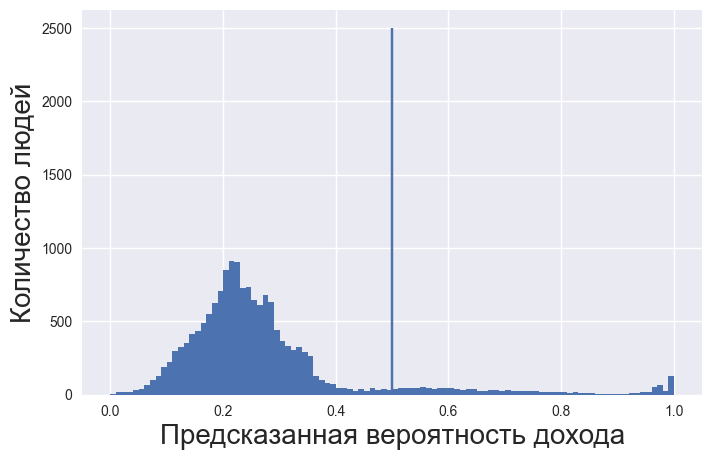

In [ ]:
plt.figure(figsize=(8, 5))

plt.hist(pred_proba, bins=100)
plt.vlines(0.5, 0, 2500)

plt.xlabel('Предсказанная вероятность дохода', fontsize=20)
plt.ylabel('Количество людей', fontsize=20)

In [132]:
experiment.log_figure('predicted_income_probability', plt)

COMET WARNING: Failing to save the matplotlib figure, reason: The figure is empty, please call log_figure() before calling show().


<Figure size 800x550 with 0 Axes>

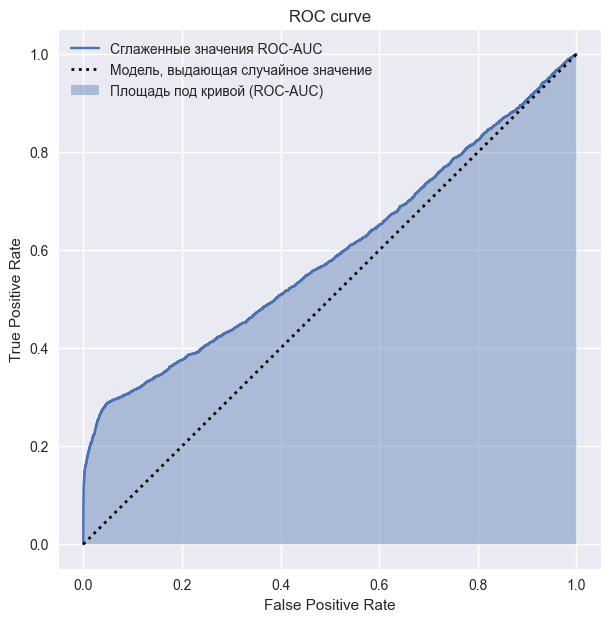

In [116]:
from sklearn.metrics import roc_curve

false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, pred_proba)

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred_proba).round(3)

print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, pred_proba).round(3)) 

ROC-AUC на тестовой выборке: 0.594


In [134]:
experiment.log_metric('roc_auc OneHot data', roc_auc)

In [121]:
pred_proba_le = linear_model_le.predict_proba(X_test_le)

pred_proba = pred_proba_le[:, 1]
pred_proba

array([0.14242652, 0.22923788, 0.12196617, ..., 0.13899653, 0.64048568,
       0.20817374], shape=(16281,))

In [122]:
roc_auc = roc_auc_score(y_test, pred_proba).round(3)
roc_auc

np.float64(0.711)

In [135]:
experiment.log_metric('roc_auc LE data', roc_auc)

In [136]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : architectural_bark_5769
COMET INFO:     url                   : https://www.comet.com/koleslena/predict-income/c3df66a34d2740d3b05533665cdce04c
COMET INFO:   Metrics:
COMET INFO:     Accuracy LE data     : 0.7904305632332166
COMET INFO:     Accuracy OneHot data : 0.7998280203918678
COMET INFO:     roc_auc LE data      : 0.711
COMET INFO:     roc_auc OneHot data  : 0.711
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix    : 2
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebo